# SIG720: Machine Learning 

# TASK 5:

## B PRIYANKAA

### s224207694
### priyayj2016@gmail.com

## TARGET GRADE: PASS(P)

## ABSTRACT:

This dataset is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. More than one contact was required to contact the same client in order to access if the bank term deposit would be 'yes' or 'no' subscribed. This dataset has both categorical and Integer type. This dataset has no missing values.

## ABOUT THE DATASET:

### There are four datasets: 

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010).
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 


#### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## TASKS:

### All the necessary libraries are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import model_selection

warnings.filterwarnings('ignore')
%matplotlib inline

# 1.Load “bank-full.csv” dataset and create a logistic regression model for predicting target variable (subscribed a term deposit or not). Use appropriate evaluation methods and report the performance of the model using appropriate metrics.

## Step 1:

1. To load “bank-full.csv” dataset.
2. To create a logistic regression model for predicting target variable.
3. Use appropriate evaluation methods and report the performance of the model using the performance metrics.

## UNZIPPING:

- The dataset downloaded from this path https://archive.ics.uci.edu/dataset/222/bank+marketing has a zipped folder with name, bank+marketing.zip

- From this zipped folder "bank+marketing.zip", the files are extracted into new folder named 'bank+marketing'.

In [2]:
# Extract the ZIP file
file_path = "C:\\Users\\Priyankaa B\\bank+marketing.zip"

from zipfile import ZipFile
with ZipFile(file_path,'r') as zip:
  zip.extractall(path='C:\\Users\\Priyankaa B\\bank+marketing')

## UNZIPPING:

- The new folder with a name 'bank+marketing' has 2 zipped folders, bank.zip and bank-additional.zip

- Bank.zip folder is now unzipped and the files are extracted into new folder named 'bank'.

In [3]:
# Extract the ZIP file\

file_path1 = "C:\\Users\\Priyankaa B\\bank+marketing\\bank.zip"

from zipfile import ZipFile
with ZipFile(file_path1,'r') as zip:
  zip.extractall(path='C:\\Users\\Priyankaa B\\bank')

### From this bank folder we have to now access the csv file named, "bank-full.csv".

In [4]:
df = pd.read_csv('C:\\Users\\Priyankaa B\\bank\\bank-full.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### ABOUT THE COLUMNS:

There are totally 17 columns in the dataset. They are:

1. Age - It is one of the Demographic variable name.
2. Job - Feature of Categorical value that tells the type of job like: technician, 'blue-collar', etc.
3. marital - Feature of Categorical value that tells the status.
4. education - Feature of Categorical value that tells the education level.
5. default - Feature of Binary value that tells if the credit is default or not.
6. balance - Feature of Integer value that tells the average yearly balance.
7. housing - Feature of Binary value that tells if the customer has housing loan or not.
8. loan - Feature of Binary value that tells if the customer has personal loan or not.
9. contact - Feature of Categorical value that tells the type of contact communiaction.
10. day_of_week - Feature of Date type that tells the last contact day of the week.
11. month - Feature of Date type that tells the last contact month of the year.
12. duration - Feature of Integer value that tells the last contact duration, in seconds.
13. campaign - Feature of Integer value that tells the number of contacts performed during this campaign and for this client.
14. pdays - Feature of Integer value that tells the number of days that passed by after the client was last contacted from a previous campaign.
15. previous -  Feature of Integer value that tells the umber of contacts performed before this campaign and for this client.
16. poutcome - Feature of Categorical value that tells the outcome of the previous marketing campaign.
17. y - Target variable of Binary type that tells **if the client has subscribed a term deposit or not**.

In [6]:
print('The shape of the dataset',df.shape)

The shape of the dataset (45211, 17)


In [7]:
print('The columns present in the dataset',df.columns)

The columns present in the dataset Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [8]:
print('The datatypes of the columns present are:',df.dtypes.value_counts())

The datatypes of the columns present are: object    10
int64      7
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# Print feature names with the number of missing entries
missing_entries = df.isnull().sum()
print(missing_entries)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [11]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Heatmap helps in better understanding of how the features are actually correlated. Dark colours denotes negative correlation and lighter shades denotes positive correlation.

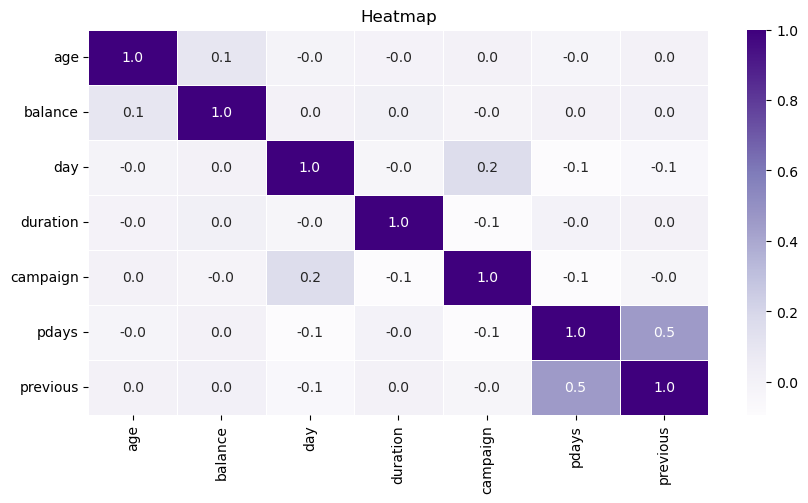

In [12]:
plt.figure(figsize=(10,5))
plt.title('Heatmap')
sns.heatmap(df.corr(), annot=True,linewidths= '.5',fmt ='.1f',cmap = 'Purples')# corr() is used to find the correlation between features and hence visulaised
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

## INSIGHTS FROM THE ABOVE HEATMAP:

### A. Features having stronger correlation with correlation value:

1. pdays(Feature of Integer value that tells the number of days that passed by after the client was last contacted from a previous campaign) has a positive correlation value of 0.5 with previous(Feature of Integer value that tells the umber of contacts performed before this campaign and for this client) feature.

### B. Features having weaker correlation with correlation value:

1. day have a negative correlation value of -0.1 with previous feature.

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## INSIGHTS FROM FIVE-POINT SUMMARY:

1. The minimum value of age ranges almost from 18 to the maximum value of 95.

2. The mean value of balance is 1362.2 euros and mean values of campaign that is, the number of contacts performed during this campaign and for this client is 2.76.

### pd.get_dummies - 

It is One-hot encoding  process of converting categorical variables into a binary (0 or 1) format, where each category is represented by a separate column. This is useful for converting categorical features into a numerical format that machine learning models can understand.

In [14]:
dff = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = dff.drop('y_yes', axis=1)
y = dff['y_yes']

- The dataset is divided with 70% for training and 30% for testing purpose.

- Here,Logistic Regression model is fit on the training data.

- Then X_test values are used to predict the outputs and stored in pred.

- Pred and y_test values are compared , its accuracy is found.

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Print shapes
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (31647, 42)
X_test: (13564, 42)
y_train: (31647,)
y_test: (13564,)


In [17]:
y_train.value_counts()

0    27956
1     3691
Name: y_yes, dtype: int64

## Printing the evaluation metrics for the Logistic Regression model

1.1. Accuracy

1.2. Confusion Matrix

1.3. Classification Report.

In [18]:
# Predict and evaluate
y_pred = model.predict(X_test)
Testing_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Confusion Matrix


<Axes: >

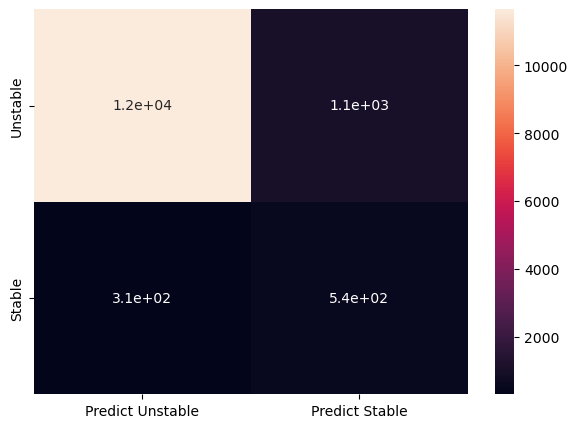

In [19]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_pred,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["Unstable","Stable"]],
                  columns = [i for i in ["Predict Unstable","Predict Stable"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [20]:
print(f'Accuracy: {Testing_accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8989236213506341
Confusion Matrix:
[[11655   311]
 [ 1060   538]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.63      0.34      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



### Conclusion for the Logistic Regression model:

1. The accuracy is said to be the proportion of the total number of predictions that were correct.Here it is said to be 89.8% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here the target variable with value 0 for nohas a precision value of 0.92 and Here the target variable with value 1 for yes has a precision value of 0.63. 

3. Recall is the proportion of actual positives that were correctly identified. 'No' -0 output has a recall value of 97%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "No and 0 value" is 94%.

# 2. Have you used any hyperparameter tuning while building the model in Q1? If yes, then plot the performances that were obtained at different steps of optimisation. Otherwise, create an optimised model and compare performance with Q1.

### Step 2: 

1. To do the hyperparameter tuning while building the model.
2. To plot the performances that were obtained at different steps of optimisation.
3. To create an optimised model and compare performance with Q1.

In [21]:
# From the initial model developed from Q1:

y_train.value_counts()

0    27956
1     3691
Name: y_yes, dtype: int64

y Target variable has 0    27956, 1     3691.

In [22]:
import random

In [23]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [24]:
y_train.value_counts()

1    3691
0    3691
Name: y_yes, dtype: int64

### Now there are 3691 datas for each class 0 and class 1.

## Feature Scaling

The StandardScaler is a preprocessing tool provided by the sklearn.preprocessing module in the scikit-learn library. It standardizes features by removing the mean and scaling to unit variance. This is commonly referred to as Z-score normalization.

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Model building

In [26]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [27]:
print(results)

                         Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression (Lasso)  0.845547    0.42048  0.822278  0.556426


In [29]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2']
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print('Optimized Model Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_optimized))
print('Precision:', precision_score(y_test, y_pred_optimized))
print('Recall:', recall_score(y_test, y_pred_optimized))
print('F1 Score:', f1_score(y_test, y_pred_optimized))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_optimized))


Optimized Model Performance:
Accuracy: 0.846652904747862
Precision: 0.422508038585209
Recall: 0.8222778473091364
F1 Score: 0.5581988105352591
ROC AUC Score: 0.8360929600911384


### Conclusion for the Logistic Regression model with balanced target 'y' variable:

1. The accuracy is said to be the proportion of the total number of predictions that were correct.Here it is said to be 84.6% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here the target variable with value 0 for nohas a precision value of 0.422. 

3. Recall is the proportion of actual positives that were correctly identified. 'No' -0 output has a recall value of 82.4%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "No and 0 value" is 55.8%.

# 3.Create two ensemble ML models for predicting the target variable using the evaluation setting that you have used in Q1 and report the performance.

### The two ensemble ML models for predicting the target variable used are:


1. **Random Forest** is an ensemble method, which means it builds a model by combining multiple models. By combining the predictions of multiple trees, Random Forest models tend to be more accurate and robust than individual decision trees.

2. **Gradient Boosting** is another powerful ensemble machine learning model, widely used for both regression and classification tasks. Gradient Boosting is an ensemble technique that combines the predictions of multiple weak learners, usually decision trees, to create a stronger overall model. Gradient Boosting models often achieve higher accuracy than other methods because they focus on correcting errors iteratively.

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

### A Random Forest model with n_estimators as 100 and random state to be 42.

In [31]:

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Classification Report:\n{class_report_rf}')

Random Forest Accuracy: 0.8319817163078738
Random Forest Confusion Matrix:
[[9872 2094]
 [ 185 1413]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     11966
           1       0.40      0.88      0.55      1598

    accuracy                           0.83     13564
   macro avg       0.69      0.85      0.73     13564
weighted avg       0.91      0.83      0.86     13564



## Conclusion based on the performance of Random Forest Model:

1. The accuracy is said to be the proportion of the total number of predictions that were correct.Here it is said to be 83.1% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here the target variable with value 0 for nohas a precision value of 0.98 and Here the target variable with value 1 for yes has a precision value of 0.40. 

3. Recall is the proportion of actual positives that were correctly identified. 'No' -0 output has a recall value of 83%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "No and 0 value" is 90%.

In [32]:
# Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

### A Gradient Boosting model with n_estimators as 100 and random state to be 42.

In [33]:

print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Gradient Boosting Confusion Matrix:\n{conf_matrix_gb}')
print(f'Gradient Boosting Classification Report:\n{class_report_gb}')

Gradient Boosting Accuracy: 0.8386906517251548
Gradient Boosting Confusion Matrix:
[[9987 1979]
 [ 209 1389]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     11966
           1       0.41      0.87      0.56      1598

    accuracy                           0.84     13564
   macro avg       0.70      0.85      0.73     13564
weighted avg       0.91      0.84      0.86     13564



## Conclusion based on the performance of Gradient Boosting Model:

1. The accuracy is said to be the proportion of the total number of predictions that were correct.Here it is said to be 83.86% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here the target variable with value 0 for nohas a precision value of 0.98 and Here the target variable with value 1 for yes has a precision value of 0.41. 

3. Recall is the proportion of actual positives that were correctly identified. 'No' -0 output has a recall value of 83%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "No and 0 value" is 90%.

# 4. Compare the performance of the three models (Q1 and Q3), explain which model is good and why.

### Conclusion for the Logistic Regression model with balanced target 'y' variable:

1. The accuracy is said to be the proportion of the total number of predictions that were correct.Here it is said to be 84.6% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here the target variable with value 0 for nohas a precision value of 0.422. 

3. Recall is the proportion of actual positives that were correctly identified. 'No' -0 output has a recall value of 82.4%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "No and 0 value" is 55.8%.


### Conclusion based on the performance of Random Forest Model:

1. The accuracy is said to be the proportion of the total number of predictions that were correct.Here it is said to be 83.1% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here the target variable with value 0 for nohas a precision value of 0.98 and Here the target variable with value 1 for yes has a precision value of 0.40. 

3. Recall is the proportion of actual positives that were correctly identified. 'No' -0 output has a recall value of 83%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "No and 0 value" is 90%.

### Conclusion based on the performance of Gradient Boosting Model:

1. The accuracy is said to be the proportion of the total number of predictions that were correct.Here it is said to be 83.86% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here the target variable with value 0 for nohas a precision value of 0.98 and Here the target variable with value 1 for yes has a precision value of 0.41. 

3. Recall is the proportion of actual positives that were correctly identified. 'No' -0 output has a recall value of 83%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "No and 0 value" is 90%.

## Random Forest perform better due to their ability to handle complex patterns and interactions in the data. This model has the most balanced precision, recall, and F1-score.

# REFERENCES:

1. S. Moro, P. Rita, and P. Cortez, "Bank Marketing," UCI Machine Learning Repository, Feb. 2012. [Online]. Available: https://archive.ics.uci.edu/dataset/222/bank+marketing
